## Importing core libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
df = pd.read_csv('LifeExpectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## EDA and Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10   BMI                             2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [4]:
# statistical summary of the data
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# checking for rows with similar values
df.duplicated().sum()

0

In [6]:
# lowercaing the column names then removing spaces before and after column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.isna().sum()

country                              0
year                                 0
status                               0
life expectancy                      0
adult mortality                      0
infant deaths                        0
alcohol                            193
percentage expenditure               0
hepatitis b                        553
measles                              0
bmi                                 32
under-five deaths                    0
polio                               19
total expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                443
population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
income composition of resources    160
schooling                          160
dtype: int64

In [7]:
# filling all null values with their respective means
df['alcohol'].fillna(np.round(df['alcohol'].mean(),2),inplace=True)
df['hepatitis b'].fillna(np.round(df['hepatitis b'].mean(),1),inplace=True)
df['bmi'].fillna(np.round(df['bmi'].mean(),2),inplace=True)
df['polio'].fillna(np.round(df['polio'].mean(),1),inplace=True)
df['total expenditure'].fillna(np.round(df['total expenditure'].mean(),2),inplace=True)
df['diphtheria'].fillna(np.round(df['diphtheria'].mean(),1),inplace=True)
df['gdp'].fillna(df['gdp'].mean(),inplace=True)
df['population'].fillna(np.round(df['population'].mean(),1),inplace=True)
df['thinness  1-19 years'].fillna(np.round(df['thinness  1-19 years'].mean(),1),inplace=True)
df['thinness 5-9 years'].fillna(np.round(df['thinness 5-9 years'].mean(),1),inplace=True)
df['income composition of resources'].fillna(np.round(df['income composition of resources'].mean(),4),inplace=True)
df['schooling'].fillna(np.round(df['schooling'].mean(),1),inplace=True)

C:\Users\odhia\AppData\Local\Temp\ipykernel_6936\957349406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol'].fillna(np.round(df['alcohol'].mean(),2),inplace=True)
C:\Users\odhia\AppData\Local\Temp\ipykernel_6936\957349406.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [8]:
# dropping unnecessary columns
df.drop(['year','country'],axis=1,inplace=True)

In [9]:
# overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   status                           2928 non-null   object 
 1   life expectancy                  2928 non-null   float64
 2   adult mortality                  2928 non-null   int64  
 3   infant deaths                    2928 non-null   int64  
 4   alcohol                          2928 non-null   float64
 5   percentage expenditure           2928 non-null   float64
 6   hepatitis b                      2928 non-null   float64
 7   measles                          2928 non-null   int64  
 8   bmi                              2928 non-null   float64
 9   under-five deaths                2928 non-null   int64  
 10  polio                            2928 non-null   float64
 11  total expenditure                2928 non-null   float64
 12  diphtheria          

In [10]:
df.duplicated().sum()

0

In [11]:
df['status'].value_counts()

status
Developing    2416
Developed      512
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

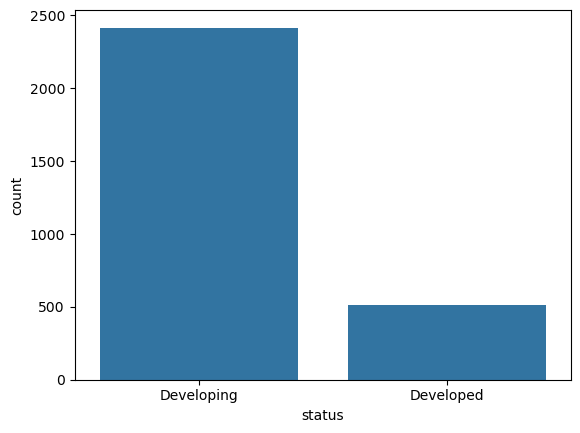

In [12]:
sns.countplot(x=df['status'])

In [13]:
df.columns

Index(['status', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [14]:
numerical_columns = df.select_dtypes(include=['float64','int64']).columns

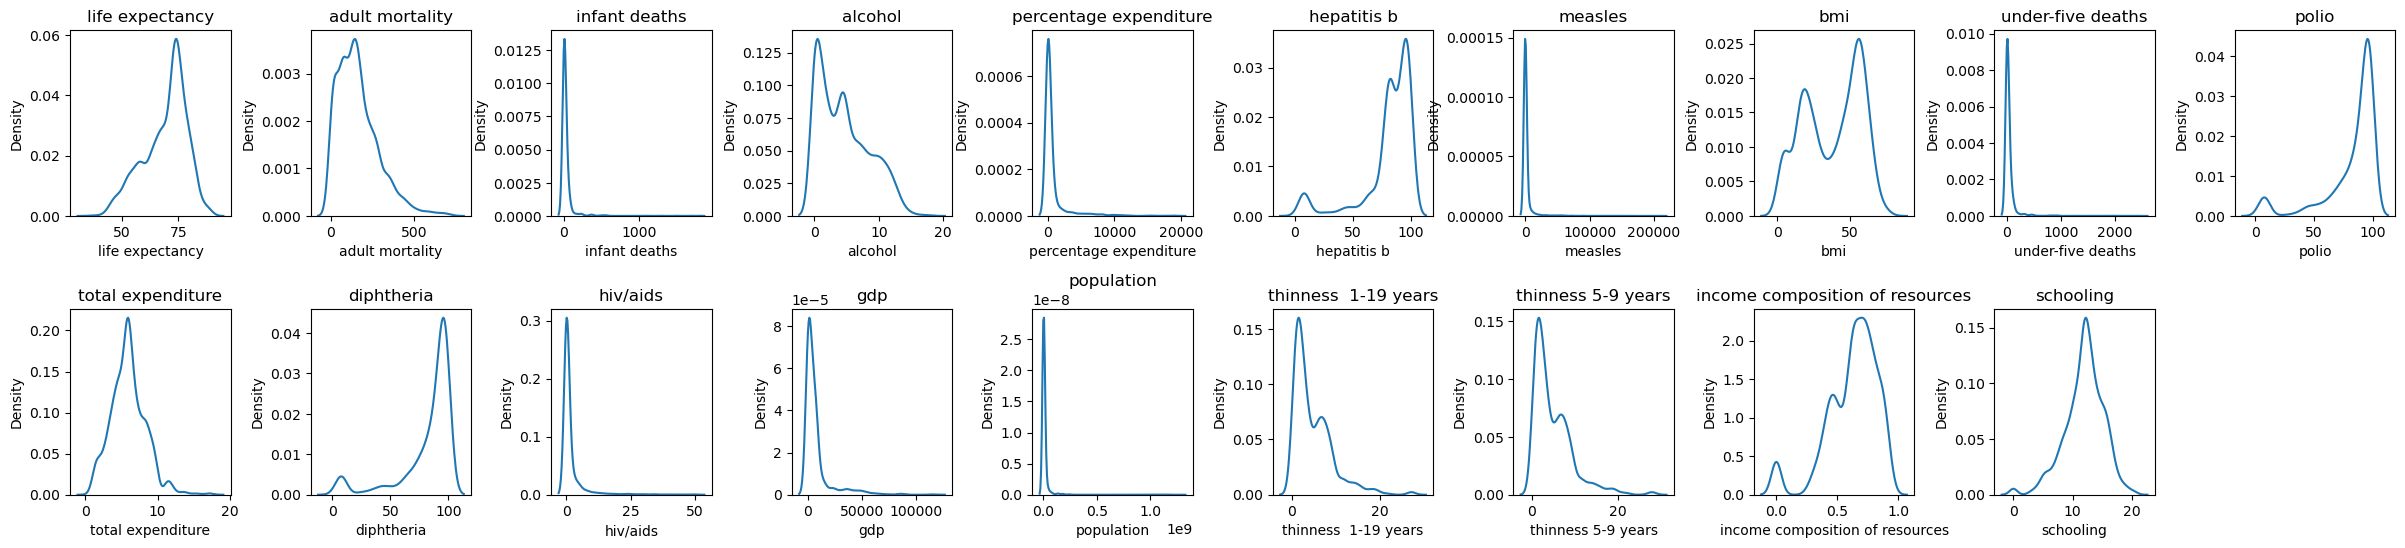

In [15]:
# we can observe that most of the numerical columns follows a gaussian distribution
plt.figure(figsize=(30,35))
n=0
for x in numerical_columns:
    n=n+1
    plt.subplot(10,10,n)
    plt.title(x)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.kdeplot(df[x])
plt.show()

In [16]:
print(f"Maximum life expectancy is: {df['life expectancy'].max()}")
print('--------------------------------------')
print(f"Minimum life expectancy is: {df['life expectancy'].min()}")

Maximum life expectancy is: 89.0
--------------------------------------
Minimum life expectancy is: 36.3


In [17]:
print(f"Maximum probability of dying between 15 and 60 years per 1000 is: {df['adult mortality'].max()}")
print(f"Minimum probability of dying between 15 and 60 years per 1000 is: {df['adult mortality'].min()}")

Maximum probability of dying between 15 and 60 years per 1000 is: 723
Minimum probability of dying between 15 and 60 years per 1000 is: 1


### Checking and removing outliers

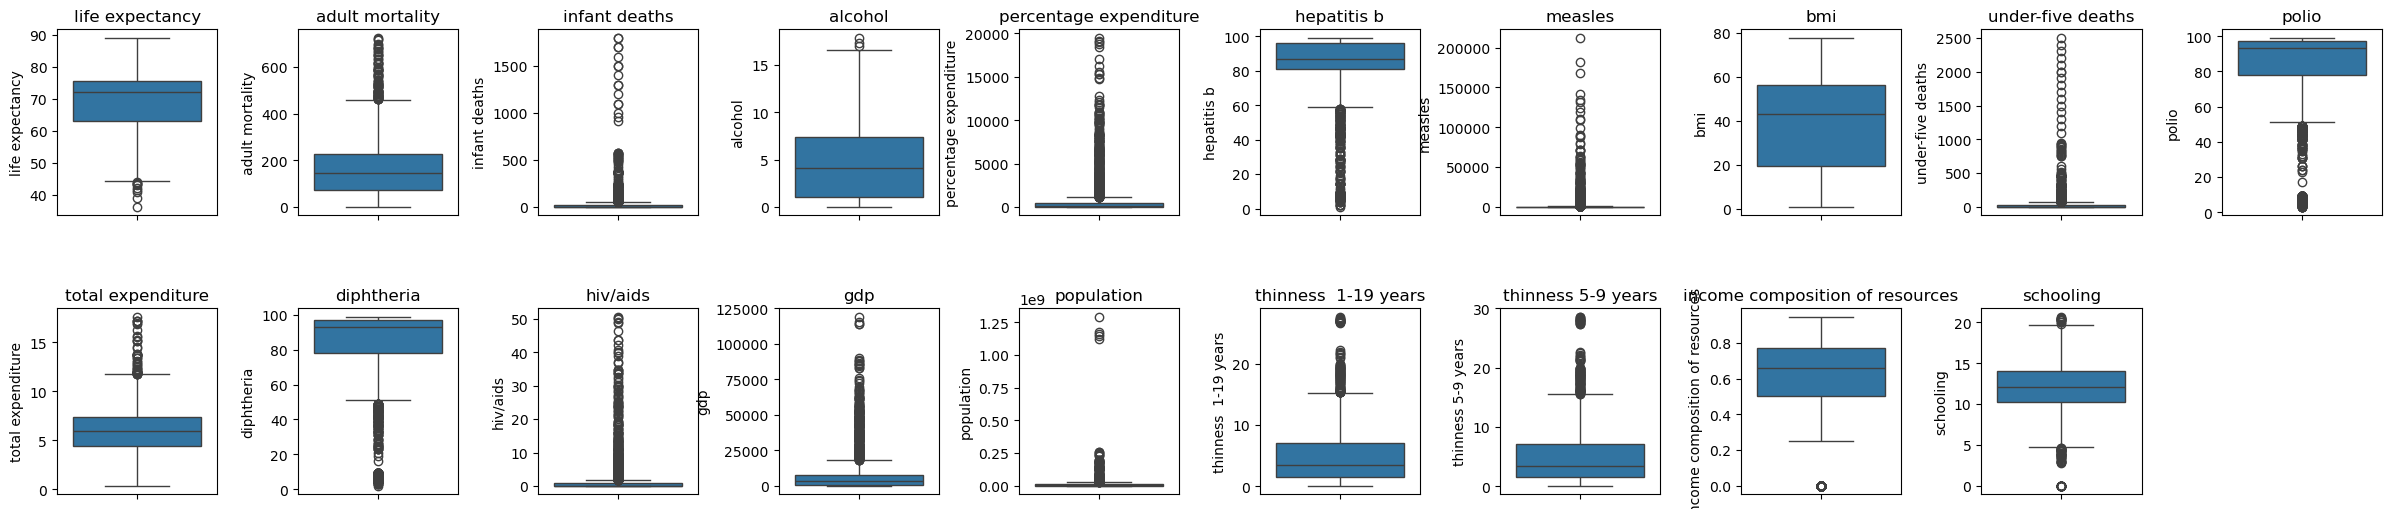

In [18]:
plt.figure(figsize=(30,35))
n=0
for x in numerical_columns:
    n=n+1
    plt.subplot(10,10,n)
    plt.title(x)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.boxplot(df[x])
plt.show()

In [19]:
numerical_columns

Index(['life expectancy', 'adult mortality', 'infant deaths', 'alcohol',
       'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [20]:
df.shape

(2928, 20)

In [21]:
for col in numerical_columns:
    upper = df[col].mean() + (2*df[col].std())
    lower = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper) & (df[col] > lower)]

In [22]:
df.shape

(1331, 20)

In [23]:
df.head()

,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
16,Developing,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Developing,77.5,8,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Developing,77.2,84,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Developing,76.9,86,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Developing,76.6,88,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3


In [24]:
df.status.value_counts()

status
Developing    1099
Developed      232
Name: count, dtype: int64

In [25]:
df['status'] = df['status'].map({'Developing':1,'Developed':0})

In [26]:
df = df.sample(frac=1).reset_index()
df.head()

,index,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,1724,1,64.0,271,2,1.31,56.056864,98.0,18,4.5,...,98.0,6.18,98.0,0.1,646.561295,2469286.0,2.4,2.5,0.609,10.5
1,1421,1,66.7,215,4,3.31,0.000000,99.0,2,36.5,...,99.0,5.43,98.0,0.1,7494.210719,12764541.8,3.5,3.5,0.601,12.1
2,394,0,72.1,16,1,10.48,456.340466,96.0,3,59.7,...,97.0,7.80,96.0,0.1,3893.689980,7658972.0,2.2,2.3,0.745,13.5
3,152,1,73.0,14,6,1.02,176.010711,62.0,0,45.9,...,81.0,5.10,79.0,0.1,3851.437869,85813.0,2.8,2.9,0.708,11.6
4,1595,1,73.2,137,3,0.49,315.663932,94.0,5729,29.8,...,95.0,3.74,95.0,0.1,4955.477743,2517419.0,9.2,8.9,0.731,12.7


In [27]:
df.drop('index',axis=1,inplace=True)

### Making the dtypes consistent

In [28]:
df['schooling'] = df['schooling'].astype('int64')
df['population'] = df['population'].astype('int64')

In [29]:
df.head()

,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,1,64.0,271,2,1.31,56.056864,98.0,18,4.5,2,98.0,6.18,98.0,0.1,646.561295,2469286,2.4,2.5,0.609,10
1,1,66.7,215,4,3.31,0.000000,99.0,2,36.5,5,99.0,5.43,98.0,0.1,7494.210719,12764541,3.5,3.5,0.601,12
2,0,72.1,16,1,10.48,456.340466,96.0,3,59.7,1,97.0,7.80,96.0,0.1,3893.689980,7658972,2.2,2.3,0.745,13
3,1,73.0,14,6,1.02,176.010711,62.0,0,45.9,7,81.0,5.10,79.0,0.1,3851.437869,85813,2.8,2.9,0.708,11
4,1,73.2,137,3,0.49,315.663932,94.0,5729,29.8,4,95.0,3.74,95.0,0.1,4955.477743,2517419,9.2,8.9,0.731,12


In [30]:
df['status'] = df['status'].astype('float64')
df['adult mortality'] = df['adult mortality'].astype('float64')
df['infant deaths'] = df['infant deaths'].astype('float64')
df['measles'] = df['measles'].astype('float64')
df['under-five deaths'] = df['under-five deaths'].astype('float64')
df['population'] = df['population'].astype('float64')
df['schooling'] = df['schooling'].astype('float64')

In [31]:
df.columns

Index(['status', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [32]:
for column in df.columns:
    df[column] = np.round(df[column],3)

In [33]:
df.head()

,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,1.0,64.0,271.0,2.0,1.31,56.057,98.0,18.0,4.5,2.0,98.0,6.18,98.0,0.1,646.561,2469286.0,2.4,2.5,0.609,10.0
1,1.0,66.7,215.0,4.0,3.31,0.000,99.0,2.0,36.5,5.0,99.0,5.43,98.0,0.1,7494.211,12764541.0,3.5,3.5,0.601,12.0
2,0.0,72.1,16.0,1.0,10.48,456.340,96.0,3.0,59.7,1.0,97.0,7.80,96.0,0.1,3893.690,7658972.0,2.2,2.3,0.745,13.0
3,1.0,73.0,14.0,6.0,1.02,176.011,62.0,0.0,45.9,7.0,81.0,5.10,79.0,0.1,3851.438,85813.0,2.8,2.9,0.708,11.0
4,1.0,73.2,137.0,3.0,0.49,315.664,94.0,5729.0,29.8,4.0,95.0,3.74,95.0,0.1,4955.478,2517419.0,9.2,8.9,0.731,12.0


### Viewing correlation and selecting correlated features to the target column

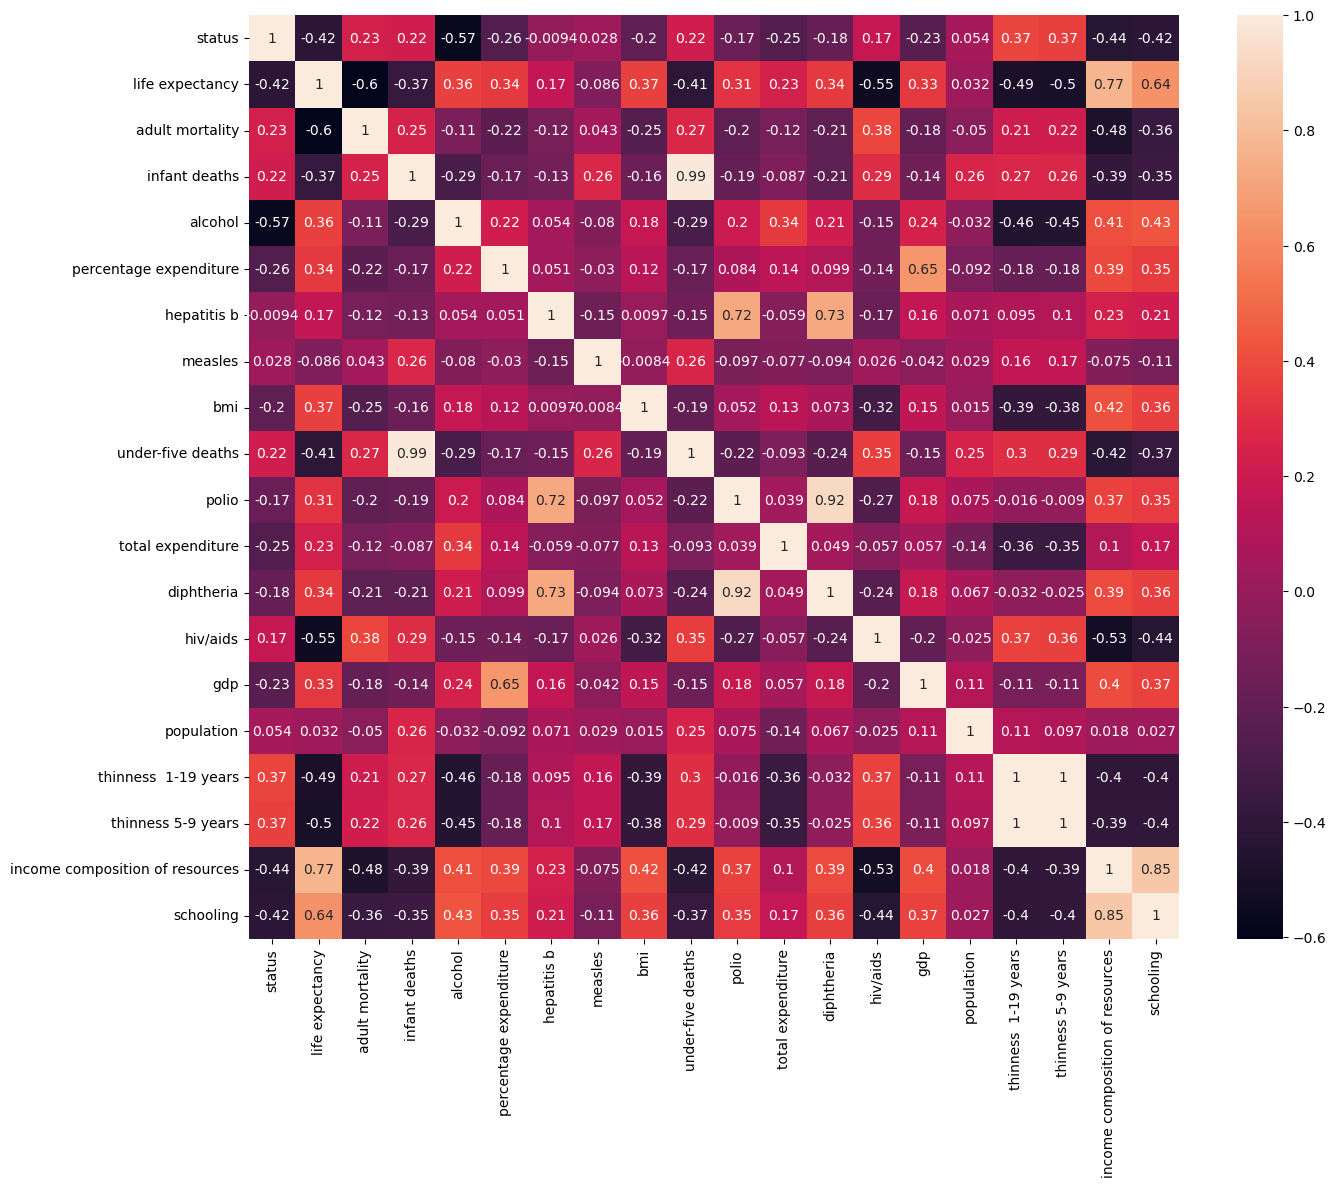

In [34]:
plt.figure(figsize=(15,12))
correlat = df.corr()
sns.heatmap(correlat,annot=True)
plt.show()

In [35]:
cor_target = abs(correlat['life expectancy'])

In [36]:
selected_features = cor_target[cor_target > 0.45]
selected_features.index

Index(['life expectancy', 'adult mortality', 'hiv/aids',
       'thinness  1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling'],
      dtype='object')

In [37]:
df1 = df[['life expectancy', 'adult mortality', 'hiv/aids','thinness  1-19 years', 'thinness 5-9 years','income composition of resources', 'schooling']]

In [38]:
df1.head()

,life expectancy,adult mortality,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,64.0,271.0,0.1,2.4,2.5,0.609,10.0
1,66.7,215.0,0.1,3.5,3.5,0.601,12.0
2,72.1,16.0,0.1,2.2,2.3,0.745,13.0
3,73.0,14.0,0.1,2.8,2.9,0.708,11.0
4,73.2,137.0,0.1,9.2,8.9,0.731,12.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [40]:
X = df1.drop('life expectancy',axis=1)
y = df1['life expectancy']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [41]:
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [42]:
model = RandomForestRegressor()

In [43]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred

array([77.326     , 73.917     , 74.501     , 73.449     , 82.595     ,
       76.478     , 74.061     , 69.49      , 71.957     , 80.104     ,
       65.798     , 72.497     , 73.007     , 73.157     , 75.686     ,
       75.661     , 62.38      , 73.338     , 72.826     , 75.338     ,
       75.746     , 63.295     , 65.097     , 72.216     , 71.707     ,
       67.389     , 74.205     , 76.881     , 74.862     , 74.279     ,
       73.813     , 66.218     , 71.9       , 75.653     , 72.514     ,
       73.561     , 72.78      , 73.403     , 69.595     , 71.789     ,
       58.899     , 73.51      , 73.922     , 81.292     , 69.701     ,
       69.872     , 67.579     , 76.229     , 58.141     , 82.297     ,
       73.684     , 73.887     , 58.689     , 74.843     , 73.425     ,
       73.854     , 67.156     , 65.733     , 64.21      , 69.905     ,
       75.44      , 73.569     , 82.385     , 63.768     , 71.464     ,
       74.943     , 68.991     , 74.108     , 79.0633    , 66.71

In [44]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.904364687136143


### Fitting the model in all the features to check for the score

In [45]:
X_all = df.drop('life expectancy',axis=1)
y_all = df['life expectancy']
X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(X_all,y_all,test_size = 0.20,random_state=42)

In [46]:
scaler2 = MinMaxScaler()
X_train_all = scaler2.fit_transform(X_train_all)
X_test_all = scaler2.transform(X_test_all)

In [47]:
model.fit(X_train_all,y_train_all)
y_pred = model.predict(X_test_all)
print(r2_score(y_test_all,y_pred))

0.8901611730571444


### Checking highly correlated independent features then fiiting the model

In [48]:
def correlation(data,threshold):
    col_corr = set()
    cor_matrix = data.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                column = cor_matrix.columns[i]
                col_corr.add(column)
                
    return col_corr

In [49]:
X_train_all_cor,X_test_all_cor,y_train_all_cor,y_test_all_cor = train_test_split(X_all,y_all,test_size = 0.20,random_state=42)

In [50]:
features_selected = correlation(X_train_all_cor,0.7)
len(features_selected)

5

In [51]:
features_selected

{'diphtheria', 'polio', 'schooling', 'thinness 5-9 years', 'under-five deaths'}

In [52]:
X_train_all_cor = X_train_all_cor.drop(features_selected,axis=1)
X_test_all_cor = X_test_all_cor.drop(features_selected,axis=1)

In [53]:
X_train_all_cor = scaler2.fit_transform(X_train_all_cor)
X_test_all_cor = scaler2.transform(X_test_all_cor)

In [54]:
model.fit(X_train_all_cor,y_train_all_cor)
y_prediction = model.predict(X_test_all_cor)
print(r2_score(y_test_all_cor,y_prediction))

0.8883977380383085


### Model hyperparameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
rf = RandomForestRegressor()
reg = GridSearchCV(rf,{'n_estimators':[10,15,20],'criterion':['friedman_mse', 'squared_error', 'poisson']},cv = 5,return_train_score = False)

In [57]:
reg.fit(X_train,y_train)
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059208,0.010844,0.001600,0.003199,friedman_mse,10,"{'criterion': 'friedman_mse', 'n_estimators': 10}",0.904874,0.872790,0.897713,0.886723,0.864439,0.885308,0.015040,2
1,0.085330,0.006335,0.003795,0.006056,friedman_mse,15,"{'criterion': 'friedman_mse', 'n_estimators': 15}",0.890168,0.865318,0.900668,0.881950,0.851496,0.877920,0.017554,8
2,0.109317,0.007533,0.004646,0.005756,friedman_mse,20,"{'criterion': 'friedman_mse', 'n_estimators': 20}",0.896633,0.879890,0.903071,0.886057,0.848509,0.882832,0.018959,5
3,0.056553,0.004052,0.003057,0.003775,squared_error,10,"{'criterion': 'squared_error', 'n_estimators':...",0.898496,0.875397,0.899491,0.884848,0.844909,0.880628,0.019980,6
4,0.081564,0.007784,0.006043,0.005818,squared_error,15,"{'criterion': 'squared_error', 'n_estimators':...",0.893857,0.873696,0.888573,0.883230,0.856074,0.879086,0.013296,7
5,0.097217,0.006107,0.012507,0.006253,squared_error,20,"{'criterion': 'squared_error', 'n_estimators':...",0.903788,0.870466,0.908431,0.888225,0.867270,0.887636,0.016753,1
6,0.071870,0.012498,0.003124,0.006248,poisson,10,"{'criterion': 'poisson', 'n_estimators': 10}",0.902538,0.862668,0.882137,0.875292,0.856674,0.875862,0.016084,9
7,0.096869,0.006250,0.003128,0.006255,poisson,15,"{'criterion': 'poisson', 'n_estimators': 15}",0.899239,0.867166,0.909255,0.885030,0.854654,0.883069,0.020056,4
8,0.124985,0.000008,0.006256,0.007662,poisson,20,"{'criterion': 'poisson', 'n_estimators': 20}",0.894897,0.877734,0.901891,0.885544,0.865042,0.885022,0.012920,3


In [58]:
regressor = RandomForestRegressor(n_estimators = 20,criterion = 'squared_error')
regressor.fit(X_train,y_train)
predicted = regressor.predict(X_test)

In [59]:
print(r2_score(y_test,predicted))

0.9027501497233883


### saving model

In [60]:
import pickle 
data = {'model':regressor,'scaler':scaler1}
with open('expectancy.pkl','wb') as file:
    pickle.dump(data,file)